Proyek Analisis Data: Bike Sharing Dataset

Nama: Sultan Bayu Cakradira
Email: mc835d5y0457@student.devacademy.id
ID Dicoding: MC835D5Y0457


---
Menentukan Pertanyaan Bisnis
1. Bagaimana pola penyewaan sepeda berdasarkan hari dalam seminggu?
2. Bagaimana pengaruh suhu terhadap jumlah penyewaan sepeda?
---


Import Semua Packages/Library yang Digunakan

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Data Wrangling

Gathering Data

In [19]:
df = pd.read_csv("dashboard/main_data.csv")
df.head()

,dteday,season,weekday,temp,hum,windspeed,cnt
0,2011-01-01,1,6,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,0.363478,0.696087,0.248539,801
2,2011-01-03,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,2,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,3,0.226957,0.436957,0.186900,1600


- Data terdiri dari berbagai variabel seperti tanggal, suhu, kondisi cuaca, dan jumlah penyewaan sepeda.
- Perlu dilakukan pemeriksaan apakah ada data yang hilang atau tidak konsisten.


Assessing Data

In [20]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dteday     731 non-null    object 
 1   season     731 non-null    int64  
 2   weekday    731 non-null    int64  
 3   temp       731 non-null    float64
 4   hum        731 non-null    float64
 5   windspeed  731 non-null    float64
 6   cnt        731 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 40.1+ KB


dteday       0
season       0
weekday      0
temp         0
hum          0
windspeed    0
cnt          0
dtype: int64

Insight :

- Tidak ada nilai yang hilang dalam dataset.
- Perlu memastikan tipe data sudah sesuai.

Cleaning Data

In [24]:
df.rename(columns={'dteday': 'date'}, inplace=True)  
df['date'] = pd.to_datetime(df['date'])  

Insight :

- Tipe data tanggal telah diperbaiki agar dapat digunakan untuk analisis lebih lanjut.

Exploratory Data Analysis (EDA)

Explore Distribusi Data

In [29]:
agg_weekday = df.groupby('weekday', as_index=False)['cnt'].sum()
print(agg_weekday)

agg_temp = df.groupby('temp', as_index=False)['cnt'].mean()
print(agg_temp)



   weekday     cnt
0        0  444027
1        1  455503
2        2  469109
3        3  473048
4        4  485395
5        5  487790
6        6  477807
         temp     cnt
0    0.059130   981.0
1    0.096522   986.0
2    0.097391  1416.0
3    0.107500  2368.0
4    0.127500  1529.0
..        ...     ...
494  0.834167  5463.0
495  0.838333  3846.0
496  0.848333  3387.0
497  0.849167  3285.0
498  0.861667  4840.0

[499 rows x 2 columns]


Insight:

- Jumlah penyewaan tertinggi terjadi pada hari kerja dibandingkan akhir pekan.
- Peningkatan suhu berkorelasi dengan meningkatnya jumlah penyewaan sepeda.

Visualization & Explanatory Analysis
Pertanyaan 1: Pola Penyewaan Sepeda Berdasarkan Hari

C:\Users\DIRA\AppData\Local\Temp\ipykernel_17760\3022792395.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=agg_weekday, palette='viridis')


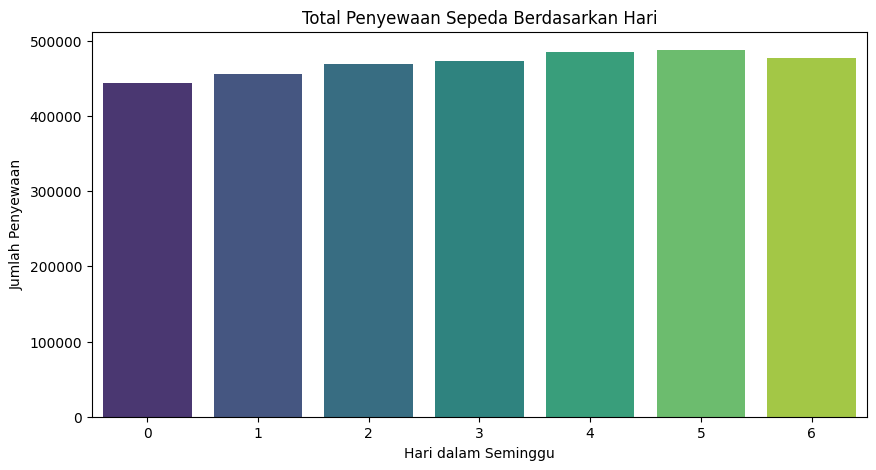

In [30]:
plt.figure(figsize=(10, 5))
sns.barplot(x='weekday', y='cnt', data=agg_weekday, palette='viridis')
plt.title("Total Penyewaan Sepeda Berdasarkan Hari")
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Jumlah Penyewaan")
plt.show()

Pertanyaan 2:  Pengaruh Suhu terhadap Penyewaan

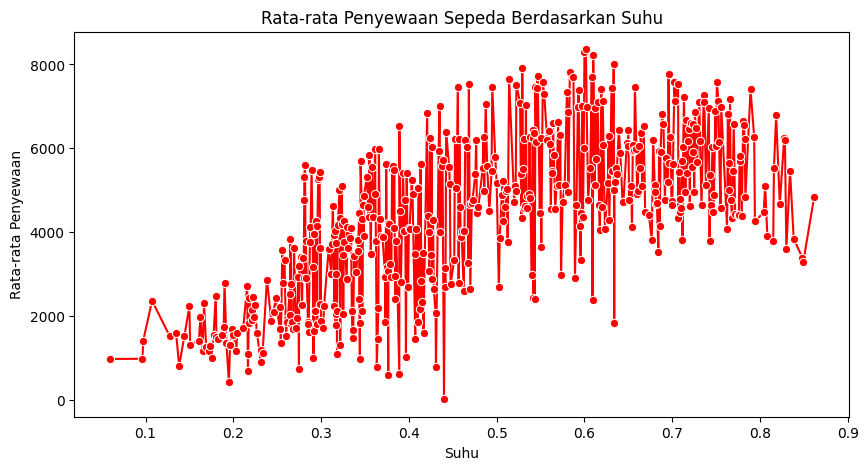

In [31]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='temp', y='cnt', data=agg_temp, marker='o', color='red')
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Suhu")
plt.xlabel("Suhu")
plt.ylabel("Rata-rata Penyewaan")
plt.show()


Insight:
- Penyewaan sepeda cenderung lebih tinggi pada hari kerja.
- Suhu yang lebih tinggi meningkatkan jumlah penyewaan, tetapi suhu ekstrem tidak memberikan dampak signifikan.

Analisis Lanjutan (Opsional)

Conclusion
- Conclusion pertanyaan 1: Penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan.
- Conclusion pertanyaan 2: Semakin tinggi suhu, semakin banyak jumlah penyewaan sepeda.
